
---------------
## Context
---------------

Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients are growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

A few years ago research was done on a tribe in America which is called the Pima tribe (also known as the Pima Indians). In this tribe, it was found that the ladies are prone to diabetes very early. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients were females at least 21 years old of Pima Indian heritage. 

-----------------
## Objective
-----------------

Research different aspects of Diabetes in the Pima Indians tribe by doing Exploratory Data Analysis.

-------------------------
## Data Dictionary
-------------------------

The dataset has the following information:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: A function that scores the likelihood of diabetes based on family history.
* Age: Age in years
* Outcome: Class variable (0: a person is not diabetic or 1: a person is diabetic)

## Importing the necessary libraries

In [1]:
# numerical python library to make computations on ndarrays
import numpy as np 

# panel data library to manipulate the dataset
import pandas as pd

# data visualisation library with special capabilities
import seaborn as sns

# standard data visualisation library
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

## Let's read the dataset

In [2]:
pima = pd.read_csv("diabetes.csv")

In [3]:
# Let's check the dataset
pima.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,20,79,37.5,0.197,26,0
759,6,190,92,20,79,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,79,44.0,0.403,43,1
762,9,89,62,20,79,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,79,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,20,79,30.1,0.349,47,1
767,1,93,70,31,79,30.4,0.315,23,0


In [4]:
len(pima.columns)

9

In [5]:
pima.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79,33.600000,0.627,50,1
1,1,85,66,29,79,26.600000,0.351,31,0
2,8,183,64,20,79,23.300000,0.672,32,1
3,1,89,66,23,94,28.100000,0.167,21,0
4,0,137,40,35,168,43.100000,2.288,33,1
5,5,116,74,20,79,25.600000,0.201,30,0
6,3,78,50,32,88,31.000000,0.248,26,1
7,10,115,69,20,79,35.300000,0.134,29,0
8,2,197,70,45,543,30.500000,0.158,53,1
9,8,125,96,20,79,31.992578,0.232,54,1


In [6]:
# Dimension of the dataset
pima.ndim

2

In [7]:
# Shape of the dataset
pima.shape

(768, 9)

## Data Exploration

In [8]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
pima.isna().values.any()

False

**Observations**
1. There is no missing values in the dataset
2.There are 2 variables of float64 datatype and 7 variables of int64 datatype.

In [10]:
# Let's see at statistical description of the dataset

pima.iloc[: , 0 : 8].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.675781,72.250000,26.447917,118.270833,32.450805,0.471876,33.240885
std,3.369578,30.436252,12.117203,9.733872,93.243829,6.875374,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,20.000000,79.000000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,79.000000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


**Observations:**

The data may contain outliers in lower and upper ranges. 

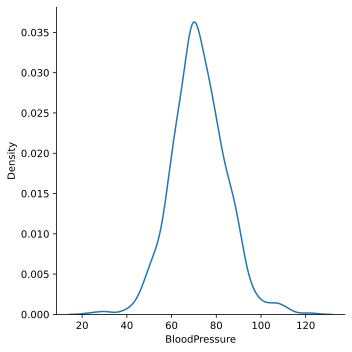

In [13]:
# Let's check Blood Pressure distribution
sns.displot(pima['BloodPressure'], kind = 'kde')
plt.tight_layout()
plt.show()

In [14]:
# Let's check what BMI a person has with the highest Glucose level
pima[pima['Glucose'] == pima['Glucose'].max()]['BMI']

661    42.9
Name: BMI, dtype: float64

In [15]:
# Let's explore BMI average metrics

m1 = pima['BMI'].mean()  # mean
print(m1)

m2 = pima['BMI'].median()  # median
print(m2)

m3 = pima['BMI'].mode()[0]  # mode
print(m3)

32.45080515543617
32.0
32.0


#### Observations:

They are mean, median and mode are approximately equal, but the mean doesn't exactly coincides with the median and the mode. We can say that the distribution is slightly skewed to the right with both Pearson coefficients being positive.


In [16]:
# Let's see how many data entries have Glucose level above average

pima[pima['Glucose'] > pima['Glucose'].mean()].shape[0]

343

In [17]:
# Let's see how many women have their 'BloodPressure' equal to the median of 'BloodPressure'
# and their 'BMI' less than the median of 'BMI'?

pima[(pima['BloodPressure'] == pima['BloodPressure'].median()) & (pima['BMI'] < pima['BMI'].median())].shape[0]

22

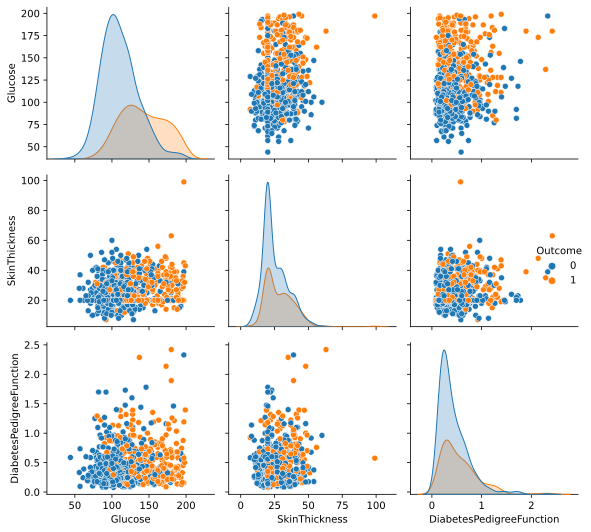

In [26]:
# Let's check pairplots for  'Glucose', 'SkinThickness', and 'DiabetesPedigreeFunction'

sns.pairplot(data = pima, vars = ['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'], hue = 'Outcome')
plt.tight_layout()
plt.show()

**Observations:**
- The glucose distribution is approximately normal for females with no diabetes and for females with diabetes looks as a mix of normal and uniform distribution;
- Distributions for skin thickness and DiabetesPedigreeFunction are loosely normal and all 4 are right skewed;
- all distributions of females with diabetes seem to have higher  
  variance than corresponding distibution for females without diabetes;
- to my eyes non of the pairs of the variables show any significant correlation. 

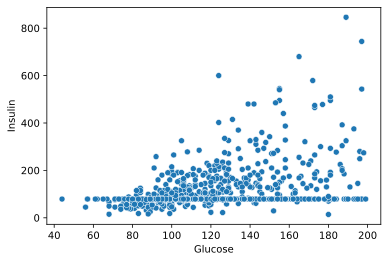

In [19]:
# Let's see the scatterplot between 'Glucose' and 'Insulin'

sns.scatterplot(x = 'Glucose', y = 'Insulin', data = pima)
plt.show()

#### Observations:

- There seems to be positive correlation between glucose and insulin levels;
- most of the data located at low insulin and glucose levels;
- there seem to be people with the same insulin level of ~ 80  and very different glucose levels ranging from very low to very high. 


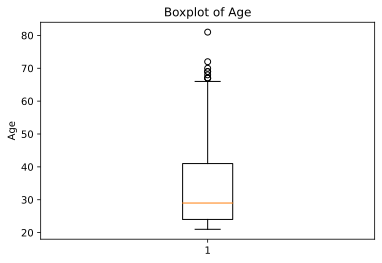

In [20]:
# Let's check distribution of Ages 

plt.boxplot(pima['Age'])

plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

#### Observations:

We see that there are some potential outliers in the upper range of ages 


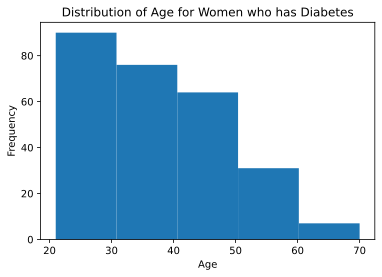

In [21]:
# Let's try to understand the number of women in different age groups given whether they have diabetes or not

plt.hist(pima[pima['Outcome'] == 1]['Age'], bins = 5)
plt.title('Distribution of Age for Women who has Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

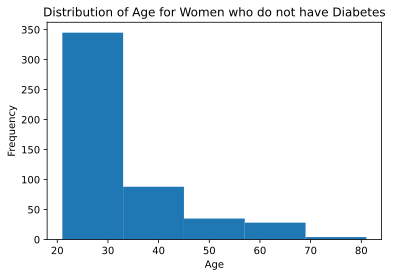

In [22]:
plt.hist(pima[pima['Outcome'] == 0]['Age'], bins = 5)
plt.title('Distribution of Age for Women who do not have Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Observations: 
- The number of females in each age category is decreasing the older the group. The histograms look like steps going down with the age; 
- Probably this means that those, how got sick with diabetes in young age, die with age because of lack of treatment and and the second histogram probably shows that there is higher chance to get sick with diabetes as the age grows;
- The dataset looks unbalanced across the age categories;


In [23]:
# Let's explore the interquartile ranges

Q1 = pima.quantile(0.25)
Q3 = pima.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                  5.0000
Glucose                     40.5000
BloodPressure               16.0000
SkinThickness               12.0000
Insulin                     48.2500
BMI                          9.1000
DiabetesPedigreeFunction     0.3825
Age                         17.0000
Outcome                      1.0000
dtype: float64


In [15]:
corr_matrix = pima.iloc[ : ,0 : 8].corr()

corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.128022,0.208987,0.009393,-0.018780,0.021546,-0.033523,0.544341
Glucose,0.128022,1.000000,0.219765,0.158060,0.396137,0.231464,0.137158,0.266673
BloodPressure,0.208987,0.219765,1.000000,0.130403,0.010492,0.281222,0.000471,0.326791
SkinThickness,0.009393,0.158060,0.130403,1.000000,0.245410,0.532552,0.157196,0.020582
Insulin,-0.018780,0.396137,0.010492,0.245410,1.000000,0.189919,0.158243,0.037676
BMI,0.021546,0.231464,0.281222,0.532552,0.189919,1.000000,0.153508,0.025748
DiabetesPedigreeFunction,-0.033523,0.137158,0.000471,0.157196,0.158243,0.153508,1.000000,0.033561
Age,0.544341,0.266673,0.326791,0.020582,0.037676,0.025748,0.033561,1.000000


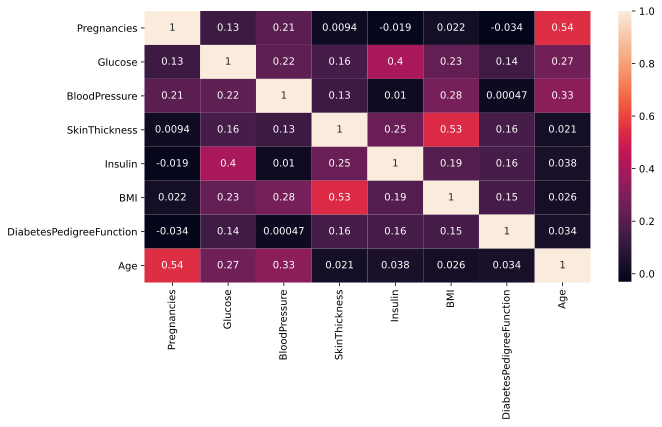

In [20]:
# Let's explore correlation matrix for the dataset 

plt.figure(figsize = (10, 5))
sns.heatmap(corr_matrix, annot = True)

# Display the plot
plt.show()

#### Observations:

- There is moderate correlation between Skin Thickness and BMI;
- There is moderate correlation between age and pregnancies which seems natural;
- There is some correlation between glucose and insulin levels
- There is some correlation between blood pressure and age 
- All other correlations look to be rather low or negligible. 
